# Loading the Data

In [1]:
import joblib
loaded_joblib = joblib.load('best-models.joblib')
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'RandomForest'])

In [2]:
# Setting the variables
X_train_df = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test_df = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
loaded_rf = loaded_joblib['RandomForest']

# Preparing the Data for SHAP

In [3]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [4]:
# Creating the X_shap values
X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
X_shap.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
3888,15.85,1.0,0.110653,36.9506,0.760044,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2497,15.10,1.0,0.087407,221.8456,0.000000,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7723,17.50,0.0,0.015592,184.8266,0.760044,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8117,10.80,0.0,0.049820,243.2144,0.760044,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7475,15.00,0.0,0.044999,140.4838,0.760044,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap 

3888     759.0120
2497     663.1368
7723    2766.3990
8117    1225.0720
7475    1685.8056
          ...    
292     1379.5376
3035    2956.1520
6832    1259.6936
8455    4206.5244
7795     605.8780
Name: Item_Outlet_Sales, Length: 400, dtype: float64

# Fitting SHAP Explainer to Model

In [6]:
# Fitting explainer to model
explainer = shap.Explainer(loaded_rf)
explainer

In [7]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

### Summary Bar Plot

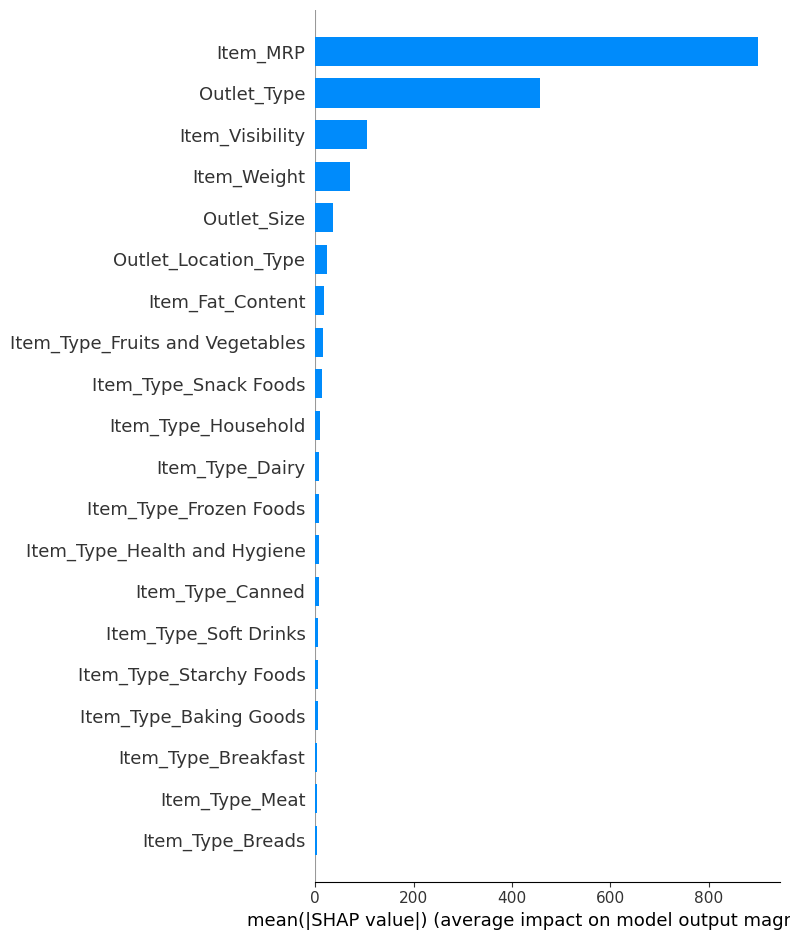

In [8]:
# Plotting a summary bar plot
shap.summary_plot(shap_values, features= X_train_df, plot_type='bar')

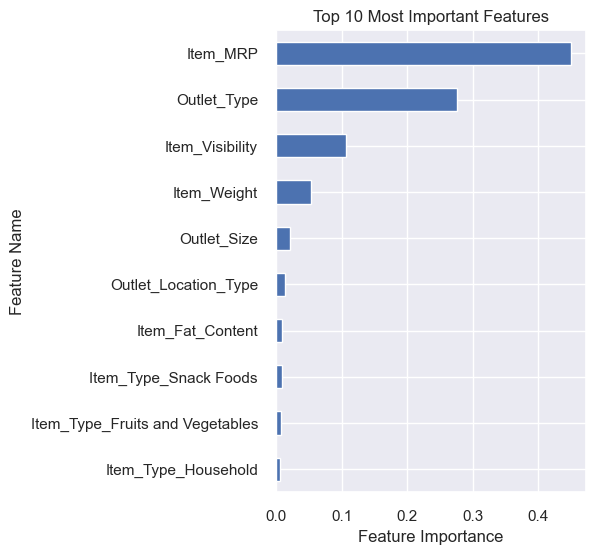

When it comes to these 2 bar plots, both Shap and the original Feature Importances have the same top 5 chosen importances.

### Summary Dot Plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


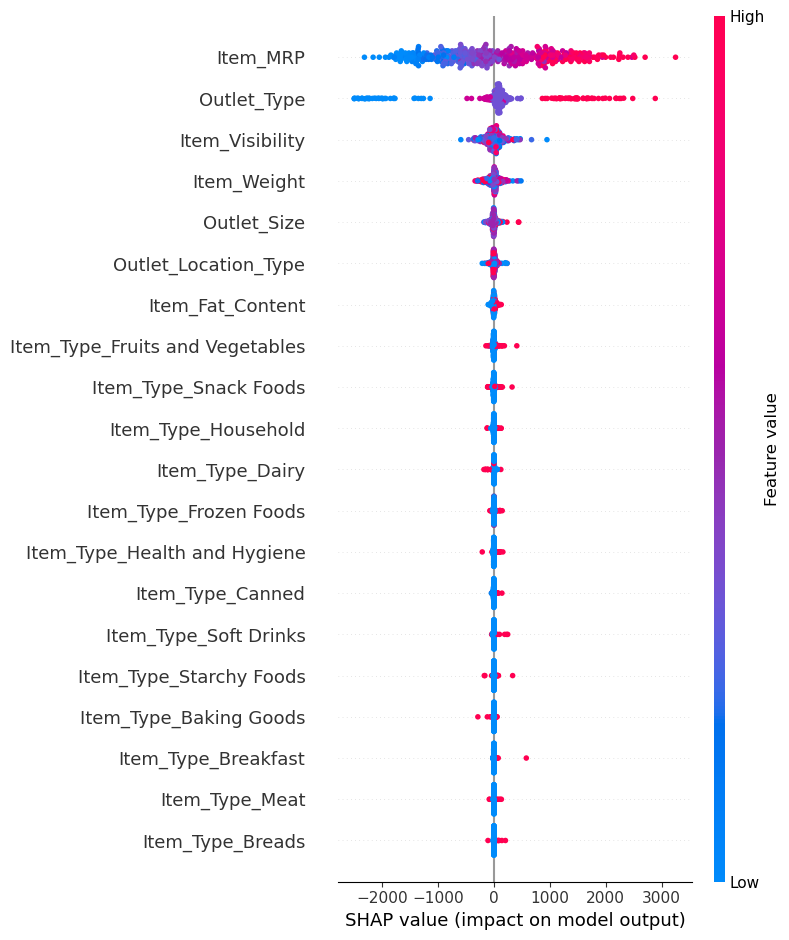

In [9]:
# Plotting a summary dot plot
shap.summary_plot(shap_values, X_shap)

**Top 3 Most Important Features:**

- **Item_MRP**
 - The Item Maximum Retail price positively influences the prediction of sales.
- **Outlet_Type**
 - Outlet Type positively influences the sales prediction.
- **Item_Visibility**
 - Item Visibility slightly negatively influenced the prediction of sales.